In [ ]:
# Import modules
%matplotlib inline

import os
import glob
import warnings

import numpy as np
import pandas as pd
import nibabel as nib

from nilearn.glm.first_level import FirstLevelModel, make_first_level_design_matrix
from nilearn.image import load_img
from nilearn.plotting import plot_design_matrix, plot_contrast_matrix

# Custom function: Used to create contrast matrix
def pad_vector(contrast_, n_columns):
    """A small routine to append zeros in contrast vectors"""
    return np.hstack((contrast_, np.zeros(n_columns - len(contrast_))))


# LSS: Least-squares separate
with warnings.catch_warnings():
    warnings.simplefilter("ignore") # remove warnings
    
    mask_img = load_img('grey_mask.nii.gz')
    language = 'CN'
    subjects = [1] #[f'{x:0>2d}' for x in range(1,27)]
    runs= [4]
    
    for sub_idx, subject in enumerate(subjects):
        
        sub_dir_1stLevel = os.path.join(f'1stGLM/sub-{language}{subject:0>3d}')
        if not os.path.exists(sub_dir_1stLevel):
            os.mkdir(sub_dir_1stLevel)

        for ridx, run in enumerate(runs):
            
            out_dir_1stLevel = os.path.join(f'1stGLM/sub-{language}{subject:0>3d}/run-{run:0>2d}')
            if not os.path.exists(out_dir_1stLevel):
                os.mkdir(out_dir_1stLevel)
                
            df = pd.read_csv(f'CN_onsets/run{ridx+1}.csv')
            
            fmri_img = load_img(f'sub-CN001/func/sub-{language}{subject:0>3d}_task-lpp{language}_run-{run:0>2d}_space-MNIColin27_desc-preproc_bold.nii.gz')
            n_scans = fmri_img.header.get_data_shape()[3] # number of scans
            frame_times = np.arange(n_scans) * 2 # 2 seconds per scan
            
            for sidx, sentense in df.iterrows():
            
                sentences_onset = pd.DataFrame(sentense).T
                sentences_onset = sentences_onset.reset_index(drop=True)
                
                design_matrix = make_first_level_design_matrix(frame_times, sentences_onset, hrf_model='spm')
                design_matrix.fillna(0)
            
                # fit GLM    
                print('Fitting GLM')
                fmri_glm = FirstLevelModel(minimize_memory=False,verbose=True,mask_img=mask_img)
                fmri_glm = fmri_glm.fit(fmri_img, design_matrices=design_matrix)
                
                # define contrasts
                n_columns = design_matrix.shape[1]
                contrasts = {f'Sentence_{sidx+1}': pad_vector([1], n_columns)}
                
                print('Computing contrasts...')
                for cidx, (contrast_id, contrast_val) in enumerate(contrasts.items()):
                    print('Contrast % 2i out of %i: %s' % (cidx + 1, len(contrasts), contrast_id))
                    
                    # comppute contrasts
                    results_1stLevel = fmri_glm.compute_contrast(contrast_val, output_type='all') 

                    # save results as nii.gz files
                    for key, value in results_1stLevel.items():
                        nib.save(value, f"{out_dir_1stLevel}/sub-{subject}_cond-{contrast_id}_{key}.nii.gz")

                print('sub-%s done' %(subject), end='\n\n')

In [ ]:
# Custom function: Used to create contrast matrix
def pad_vector(contrast_, n_columns):
    """A small routine to append zeros in contrast vectors"""
    return np.hstack((contrast_, np.zeros(n_columns - len(contrast_))))

In [5]:
# LSS: Least-squares separate

with warnings.catch_warnings():
    warnings.simplefilter("ignore") # remove warnings
    
    mask_img = load_img('grey_mask.nii.gz')
    language = 'CN'
    subjects = [1] #[f'{x:0>2d}' for x in range(1,27)]
    runs= [4]
    
    for sub_idx, subject in enumerate(subjects):
        
        sub_dir_1stLevel = os.path.join(f'1stGLM/sub-{language}{subject:0>3d}')
        if not os.path.exists(sub_dir_1stLevel):
            os.mkdir(sub_dir_1stLevel)

        for ridx, run in enumerate(runs):
            
            out_dir_1stLevel = os.path.join(f'1stGLM/sub-{language}{subject:0>3d}/run-{run:0>2d}')
            if not os.path.exists(out_dir_1stLevel):
                os.mkdir(out_dir_1stLevel)
                
            df = pd.read_csv(f'CN_onsets/run{ridx+1}.csv')
            
            fmri_img = load_img(f'sub-CN001/func/sub-{language}{subject:0>3d}_task-lpp{language}_run-{run:0>2d}_space-MNIColin27_desc-preproc_bold.nii.gz')
            n_scans = fmri_img.header.get_data_shape()[3] # number of scans
            frame_times = np.arange(n_scans) * 2 # 2 seconds per scan
            
            for sidx, sentense in df.iterrows():
            
                sentences_onset = pd.DataFrame(sentense).T
                sentences_onset = sentences_onset.reset_index(drop=True)
                
                design_matrix = make_first_level_design_matrix(frame_times, sentences_onset, hrf_model='spm')
                design_matrix.fillna(0)
            
                # fit GLM    
                print('Fitting GLM')
                fmri_glm = FirstLevelModel(minimize_memory=False,verbose=True,mask_img=mask_img)
                fmri_glm = fmri_glm.fit(fmri_img, design_matrices=design_matrix)
                
                # define contrasts
                n_columns = design_matrix.shape[1]
                contrasts = {f'Sentence_{sidx+1}': pad_vector([1], n_columns)}
                
                print('Computing contrasts...')
                for cidx, (contrast_id, contrast_val) in enumerate(contrasts.items()):
                    print('Contrast % 2i out of %i: %s' % (cidx + 1, len(contrasts), contrast_id))
                    
                    # comppute contrasts
                    results_1stLevel = fmri_glm.compute_contrast(contrast_val, output_type='all') 

                    # save results as nii.gz files
                    for key, value in results_1stLevel.items():
                        nib.save(value, f"{out_dir_1stLevel}/sub-{subject}_cond-{contrast_id}_{key}.nii.gz")

                print('sub-%s done' %(subject), end='\n\n')

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.459925889968872 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_1
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.38769006729126 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_2
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.378211975097656 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_3
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.705013990402222 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_4
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.329685926437378 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_5
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.696722984313965 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_6
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.619599103927612 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_7
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 12.009543180465698 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_8
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.218013048171997 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_9
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.611772298812866 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_10
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.47405195236206 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_11
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.625412225723267 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_12
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.571585178375244 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_13
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.591769218444824 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_14
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.534914016723633 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_15
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.361816167831421 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_16
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.496945142745972 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_17
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.737184047698975 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_18
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.653181314468384 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_19
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.300745010375977 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_20
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.528208017349243 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_21
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.473994255065918 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_22
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.449470043182373 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_23
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.316775798797607 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_24
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.921995878219604 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_25
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.668707132339478 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_26
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.560187101364136 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_27
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.426561117172241 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_28
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.610628843307495 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_29
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.717974185943604 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_30
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.422178983688354 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_31
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.437837839126587 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_32
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.28242015838623 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_33
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.601843118667603 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_34
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.497370958328247 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_35
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.401232957839966 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_36
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.836270809173584 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_37
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.892711877822876 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_38
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.687385082244873 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_39
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.758831024169922 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_40
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.72126817703247 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_41
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.5920729637146 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_42
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.602633953094482 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_43
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.61827301979065 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_44
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.359707832336426 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_45
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.439946174621582 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_46
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.624621152877808 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_47
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.430900812149048 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_48
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.439073085784912 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_49
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.405020952224731 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_50
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.735288143157959 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_51
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.932403802871704 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_52
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.804286003112793 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_53
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.5434250831604 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_54
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.526731014251709 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_55
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.75310206413269 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_56
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.816082954406738 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_57
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.70722484588623 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_58
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.89061713218689 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_59
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.51104211807251 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_60
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.537604093551636 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_61
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.507078886032104 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_62
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.505150079727173 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_63
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.452857971191406 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_64
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.422205924987793 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_65
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.3750901222229 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_66
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.673314094543457 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_67
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.704691886901855 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_68
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.460784912109375 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_69
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.838765144348145 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_70
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.830668926239014 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_71
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.659422874450684 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_72
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.55259370803833 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_73
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.659337043762207 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_74
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.596551179885864 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_75
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.668176889419556 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_76
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.620980978012085 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_77
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.611552000045776 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_78
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.637540817260742 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_79
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.524565935134888 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_80
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.615248918533325 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_81
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.617373943328857 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_82
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.665335893630981 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_83
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.549228191375732 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_84
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.588115930557251 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_85
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.649348974227905 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_86
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.652238130569458 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_87
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.622869968414307 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_88
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.606640815734863 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_89
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.517976999282837 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_90
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.678002834320068 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_91
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.653358221054077 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_92
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.672061920166016 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_93
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.558080911636353 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_94
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.710101842880249 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_95
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.648299217224121 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_96
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.63796615600586 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_97
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.887481212615967 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_98
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.844012975692749 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_99
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.530587911605835 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_100
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.430440902709961 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_101
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.485735893249512 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_102
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.448380947113037 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_103
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.57089114189148 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_104
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.426555871963501 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_105
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.68796181678772 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_106
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.548059225082397 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_107
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.600239276885986 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_108
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.73738980293274 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_109
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.614421129226685 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_110
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.633090257644653 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_111
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.550219058990479 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_112
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.7048180103302 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_113
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.506954908370972 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_114
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.443142890930176 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_115
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.899527311325073 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_116
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.634918928146362 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_117
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.450052976608276 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_118
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.72873306274414 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_119
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 12.00557279586792 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_120
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.640792846679688 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_121
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.726063966751099 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_122
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.696291208267212 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_123
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.726954936981201 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_124
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 12.13329792022705 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_125
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.746196985244751 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_126
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.688913822174072 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_127
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.631714820861816 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_128
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.8123037815094 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_129
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.79020094871521 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_130
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.63787317276001 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_131
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.899448156356812 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_132
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.800121784210205 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_133
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.868977785110474 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_134
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.584903001785278 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_135
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 12.106364727020264 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_136
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 12.093345165252686 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_137
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.889095306396484 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_138
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.880490779876709 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_139
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 12.011605024337769 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_140
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.969103813171387 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_141
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.992088079452515 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_142
sub-1 done

Fitting GLM


Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 11.817723035812378 seconds.



Computing contrasts...
  Contrast  1 out of 1: Sentence_143
sub-1 done



<Axes: label='conditions', ylabel='scan number'>

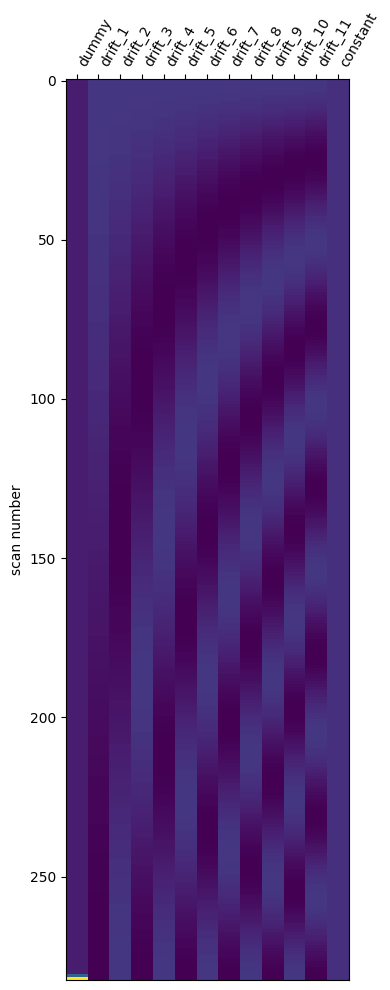

In [7]:
plot_design_matrix(design_matrix, rescale=True)

<Axes: label='conditions'>

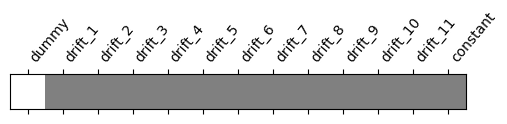

In [8]:
plot_contrast_matrix(contrasts['Sentence_143'], design_matrix=design_matrix)